### (Setup)
Load packages and simulation results

In [1]:
using Plots
pyplot()

Plots.PyPlotBackend()

In [9]:
# plot function definitions
function plot_cost(p, Jm; kwargs...) # Jm = 2-array of cost over p and method
    plot( p, Jm[:,2], linewidth=2, label="SC opt.", ylabel="LQR cost", xlabel="Loss probability"; kwargs... )
    plot!( p, Jm[:,3], linewidth=2, label="OC opt."; kwargs... )
    plot!( p, Jm[:,1], linewidth=2, label="orig."; kwargs... )
end
function plot_ratio(p, Jm; kwargs...) # Jm = 2-array of cost over p and method
    plot( p, 100 * (1 .- Jm[:,2] ./ Jm[:,1]), linewidth=2, label="SC opt.", ylabel="% LQR cost reduction", xlabel="Loss probability"; kwargs... )
    plot!( p, 100 * (1 .- Jm[:,3] ./ Jm[:,1]), linewidth=2, label="OC opt."; kwargs... )
end

plot_cost(p, J, shareOV, hold; kwargs...) = plot_cost(p, J[:,:,2-shareOV,2-hold]; kwargs...)
plot_ratio(p, J, shareOV, hold; kwargs...) = plot_ratio(p, J[:,:,2-shareOV,2-hold]; kwargs...)

plot_ratio (generic function with 2 methods)

In [10]:
# load simulation results
include("simdata.jl")

Loaded simulation results for seed values [10]


In [27]:
# global parameters
hold = false

false

# Storyline

So far, we have developed a replication algorithm based on very fundamental control-related transparency conditions (replicated state machine that can omit outputs under real-time constraints).
The characteristics of the algorithm were evaluated in terms of _application-agnostic_ performance metrics, i.e., availability, latency, and communication cost.

Now, we consider two further aspects, namely _application-specific_ performance metrics and _optimizations_.

+ Application-specific performance metrics: here we want to investigate the influence of the system model parameters on the overall standard LQR cost
+ Application-agnostic optimizations:
  * communication cost (already discussed possibilities to save states based on previous acknowledgements)
  * IV-"throughput" (aggregate IVs, evaluate influence on application-specific performance, sim. Quarts)
+ Application-specific optimizations: use control-system specific metrics to choose proposals

## Application-specific Performance Optimizations

Unstable system with 5 sensors and 1 actuator simulated with three protocol variants

+ _orig._ – original algorithm (state-consistent)
+ _SC opt._ – state-consistent performance optimization: coordinator picks the estimate with the best expected performance from a state-consistent candidate set
+ _OC opt._ – "full" preformance optimization: oordinator picks the estimate with the best expected performance from an output-consistent candidate set

Moreover, two scenarios are compared, where the replicas either use the "true" previous output vector for their state prediction or assume that their own output vector was previously applied.

### Simulation Results

#### Scenario 1: Replicas always receive OV

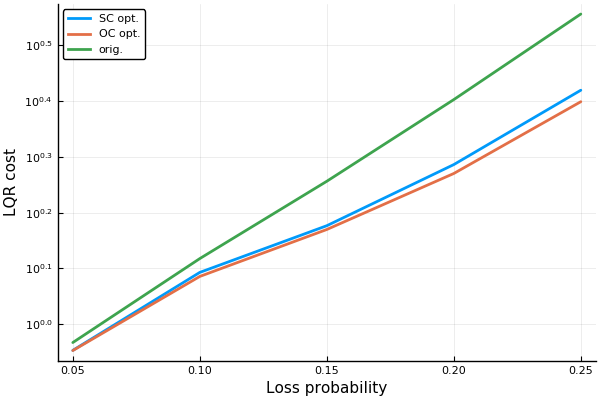

In [28]:
plot_cost(p,Jrep[10],true,hold,yscale=:log10)

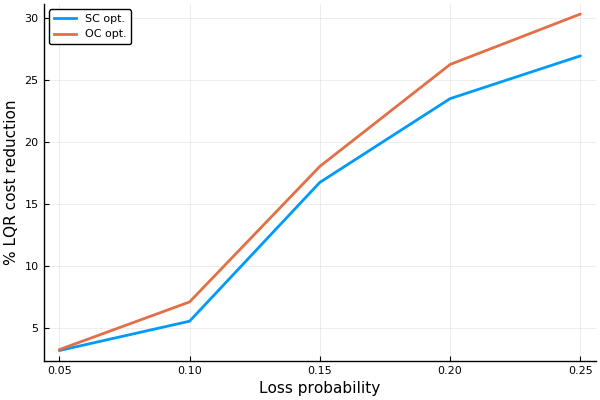

In [29]:
plot_ratio(p,Jrep[10],true,hold)

#### Scenario 2: Replicas use best guess for OV

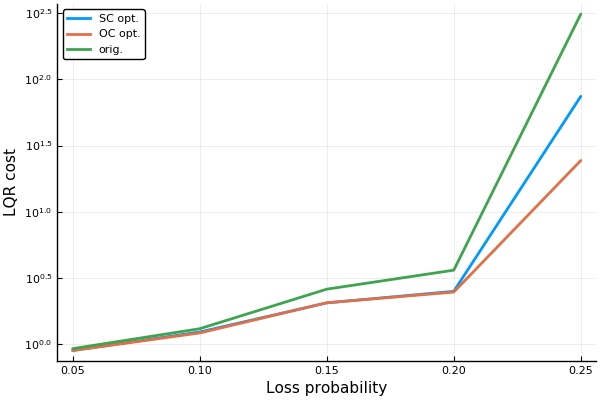

In [30]:
plot_cost(p,Jrep[10],false,hold,yscale=:log10)

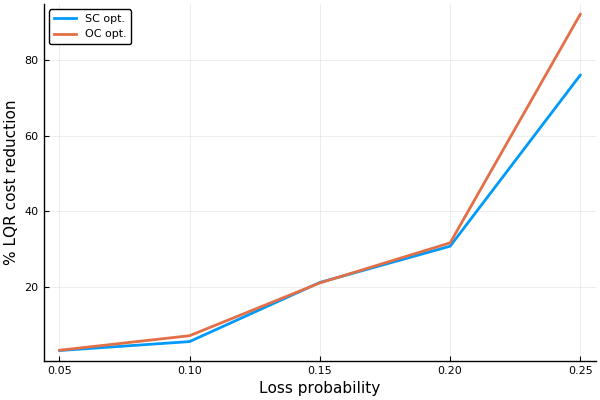

In [31]:
plot_ratio(p,Jrep[10],false,hold)